In [1]:
# ===============================================================
# 01 - EDA y Preprocesamiento del Dataset IPS
# Proyecto: Psych Phenotyping Paraguay 🇵🇾
# Autor: Manuel Núñez
# Maestría en Ciencia de Datos - Universidad Comunera (UCOM)
# ===============================================================

import os, re, pathlib, unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 120)
sns.set(style="whitegrid", palette="pastel")

BASE_PATH = pathlib.Path.cwd()
if BASE_PATH.name == "notebooks":
    BASE_PATH = BASE_PATH.parent

DATA_PATH = BASE_PATH / "data"
RAW_FILE = DATA_PATH / "ips_raw.csv"
CLEAN_FILE = DATA_PATH / "ips_clean.csv"

print(f"BASE_PATH: {BASE_PATH}")
print(f"RAW_FILE: {RAW_FILE.exists()} | CLEAN_FILE: {CLEAN_FILE.exists()}")


BASE_PATH: /Users/manuelnunez/Projects/psych-phenotyping-paraguay
RAW_FILE: True | CLEAN_FILE: False


In [2]:
# ---------------------------------------------------------------
# Cargar datos crudos
# ---------------------------------------------------------------
if not RAW_FILE.exists():
    raise FileNotFoundError("⚠️ No se encontró ips_raw.csv en /data/.")
    
df_raw = pd.read_csv(RAW_FILE)
print(f"✅ Dataset cargado: {df_raw.shape[0]} filas, {df_raw.shape[1]} columnas")
df_raw.head()


✅ Dataset cargado: 3155 filas, 10 columnas


,Archivo,Prontuario,Nombre Paciente,Sexo,Fecha Nacimiento,N° Consulta,Id,Fecha Consulta,Motivo Consulta,Tipo
0,1060906.pdf,406231,RODRIGUEZ DE BRITEZ(E,Feminino,15/11/1964,1,1,16/05/2025,Reposicion de medicacion 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ( ) PULSO ( ) TEM...,ansiedad
1,1060906.pdf,406231,RODRIGUEZ DE BRITEZ(E,Feminino,15/11/1964,2,1,14/04/2025,acude para reposicion 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ( ) PULSO ( ) TEMPER...,ansiedad
2,1060906.pdf,406231,RODRIGUEZ DE BRITEZ(E,Feminino,15/11/1964,3,1,19/03/2025,"Se encuentra estable, tranquila, refiere buen animo. Mejoria de sintomas Se encuentra estable, tranquila, refiere bu...",ansiedad
3,1060906.pdf,406231,RODRIGUEZ DE BRITEZ(E,Feminino,15/11/1964,4,1,13/03/2025,reposicion segun indicaciones de tratante 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ...,ansiedad
4,1060906.pdf,406231,RODRIGUEZ DE BRITEZ(E,Feminino,15/11/1964,5,1,13/02/2025,reposicion segun indicaciones de tratante 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ...,ansiedad


In [3]:
# ---------------------------------------------------------------
# Auditoría inicial
# ---------------------------------------------------------------
df_raw.info()
df_raw.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Archivo           3155 non-null   object
 1   Prontuario        3155 non-null   int64 
 2   Nombre Paciente   3155 non-null   object
 3   Sexo              3155 non-null   object
 4   Fecha Nacimiento  3155 non-null   object
 5   N° Consulta       3155 non-null   int64 
 6   Id                3155 non-null   int64 
 7   Fecha Consulta    3155 non-null   object
 8   Motivo Consulta   3148 non-null   object
 9   Tipo              3155 non-null   object
dtypes: int64(3), object(7)
memory usage: 246.6+ KB


Archivo             0
Prontuario          0
Nombre Paciente     0
Sexo                0
Fecha Nacimiento    0
N° Consulta         0
Id                  0
Fecha Consulta      0
Motivo Consulta     7
Tipo                0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


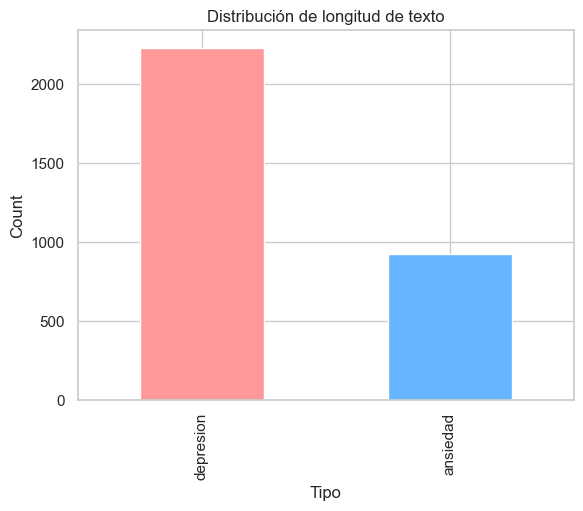

count     3155.000000
mean      1881.963233
std       2982.332377
min          3.000000
25%        461.000000
50%        765.000000
75%       2110.000000
max      32767.000000
Name: text_length, dtype: float64


In [4]:
# ---------------------------------------------------------------
# Distribución de etiquetas y longitud de texto
# ---------------------------------------------------------------
text_col = 'Motivo Consulta' if 'Motivo Consulta' in df_raw.columns else df_raw.columns[0]
if 'Tipo' in df_raw.columns:
    df_raw['Tipo'] = df_raw['Tipo'].str.lower().str.strip()
    df_raw['Tipo'].value_counts().plot(kind='bar', color=['#ff9999','#66b3ff'], title='Distribución de clases')

df_raw['text_length'] = df_raw[text_col].astype(str).apply(len)
sns.histplot(df_raw['text_length'], bins=30, kde=True)
plt.title("Distribución de longitud de texto")
plt.show()

print(df_raw['text_length'].describe())


In [5]:
# ---------------------------------------------------------------
# Limpieza de texto
# ---------------------------------------------------------------
def clean_text(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = unicodedata.normalize("NFKD", text)
    text = re.sub(r"[^a-záéíóúüñ0-9\s.,!?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_raw['text_clean'] = df_raw[text_col].apply(clean_text)
df_raw[['Motivo Consulta', 'text_clean']].head()


,Motivo Consulta,text_clean
0,Reposicion de medicacion 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ( ) PULSO ( ) TEM...,reposicion de medicacion 2 examen fisico gral. y ginecologico peso talla presion arterial pulso temperatura 3 metodo...
1,acude para reposicion 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ( ) PULSO ( ) TEMPER...,acude para reposicion 2 examen fisico gral. y ginecologico peso talla presion arterial pulso temperatura 3 metodos a...
2,"Se encuentra estable, tranquila, refiere buen animo. Mejoria de sintomas Se encuentra estable, tranquila, refiere bu...","se encuentra estable, tranquila, refiere buen animo. mejoria de sintomas se encuentra estable, tranquila, refiere bu..."
3,reposicion segun indicaciones de tratante 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ...,reposicion segun indicaciones de tratante 2 examen fisico gral. y ginecologico peso talla presion arterial pulso tem...
4,reposicion segun indicaciones de tratante 2) EXAMEN FISICO GRAL. Y GINECOLOGICO PESO ( ) TALLA ( ) PRESION ARTERIAL ...,reposicion segun indicaciones de tratante 2 examen fisico gral. y ginecologico peso talla presion arterial pulso tem...


In [6]:
# ---------------------------------------------------------------
# Duplicados
# ---------------------------------------------------------------
duplicates = df_raw.duplicated(subset=['text_clean'])
print(f"Duplicados exactos: {duplicates.sum()} / {len(df_raw)}")

df_clean = df_raw[~duplicates].copy().reset_index(drop=True)
print(f"Dataset sin duplicados: {df_clean.shape}")


Duplicados exactos: 29 / 3155
Dataset sin duplicados: (3126, 12)


In [7]:
# ---------------------------------------------------------------
# Columnas finales y normalización
# ---------------------------------------------------------------
cols = ['Id', 'Fecha Consulta', 'Tipo', 'text_clean']
df_final = df_clean[cols].copy() if all(c in df_clean.columns for c in cols) else df_clean.copy()

df_final = df_final.rename(columns={
    'Id': 'id_paciente',
    'Tipo': 'etiqueta',
    'Fecha Consulta': 'fecha',
    'text_clean': 'texto'
})
df_final['etiqueta'] = df_final['etiqueta'].str.lower().str.strip()

print("Columnas finales:", df_final.columns.tolist())
df_final.head()


Columnas finales: ['id_paciente', 'fecha', 'etiqueta', 'texto']


,id_paciente,fecha,etiqueta,texto
0,1,16/05/2025,ansiedad,reposicion de medicacion 2 examen fisico gral. y ginecologico peso talla presion arterial pulso temperatura 3 metodo...
1,1,14/04/2025,ansiedad,acude para reposicion 2 examen fisico gral. y ginecologico peso talla presion arterial pulso temperatura 3 metodos a...
2,1,19/03/2025,ansiedad,"se encuentra estable, tranquila, refiere buen animo. mejoria de sintomas se encuentra estable, tranquila, refiere bu..."
3,1,13/03/2025,ansiedad,reposicion segun indicaciones de tratante 2 examen fisico gral. y ginecologico peso talla presion arterial pulso tem...
4,1,13/02/2025,ansiedad,reposicion segun indicaciones de tratante 2 examen fisico gral. y ginecologico peso talla presion arterial pulso tem...


In [8]:
# ---------------------------------------------------------------
# Guardar dataset limpio
# ---------------------------------------------------------------
df_final.to_csv(CLEAN_FILE, index=False, encoding='utf-8')
print(f"✅ Archivo guardado: {CLEAN_FILE} ({df_final.shape[0]} filas)")


✅ Archivo guardado: /Users/manuelnunez/Projects/psych-phenotyping-paraguay/data/ips_clean.csv (3126 filas)


Distribución de clases:
etiqueta
depresion    2201
ansiedad      925
Name: count, dtype: int64


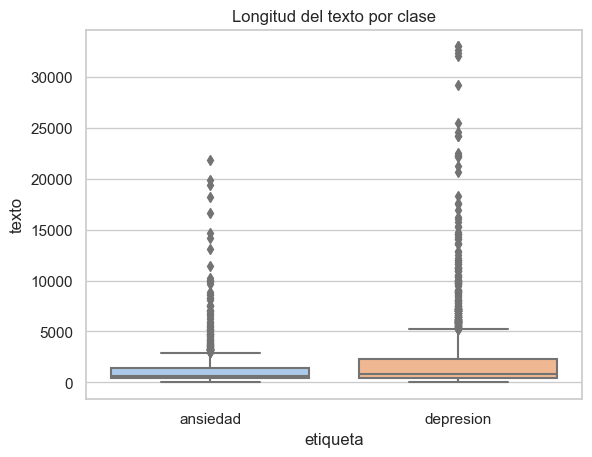

In [9]:
# ---------------------------------------------------------------
# Verificación post-limpieza
# ---------------------------------------------------------------
print("Distribución de clases:")
print(df_final['etiqueta'].value_counts())

sns.boxplot(data=df_final, x='etiqueta', y=df_final['texto'].str.len())
plt.title("Longitud del texto por clase")
plt.show()


In [10]:
# ---------------------------------------------------------------
# Registro de decisiones
# ---------------------------------------------------------------
print("""
Resumen de decisiones de limpieza:
- Removidos duplicados exactos.
- Textos normalizados a minúsculas y sin caracteres especiales.
- Columnas finales: id_paciente, etiqueta, fecha, texto.
- Dataset limpio guardado como ips_clean.csv.
""")



Resumen de decisiones de limpieza:
- Removidos duplicados exactos.
- Textos normalizados a minúsculas y sin caracteres especiales.
- Columnas finales: id_paciente, etiqueta, fecha, texto.
- Dataset limpio guardado como ips_clean.csv.

